## Week8 LogisticRegression
In week 8, we've covered:
* Logistic regression
* Build logistic regression model with Sklearn  

Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a **TODO**.

Upload **Week8_LogisiceRegression_Homework.ipynb**, `train.csv` and `test.csv` to Google Drive.

The dataset is about predicting which passengers `Survived` the **sinking of the Titanic**.

Below are the descriptions contained in that data dictionary:

- PassengerID - A column added by us to identify each row and make submissions easier  
- Survived - Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)  
- Pclass - The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)  
- Sex - The passenger's sex  
- Age - The passenger's age in years  
- SibSp - The number of siblings or spouses the passenger had aboard the Titanic  
- Parch - The number of parents or children the passenger had aboard the Titanic  
- Ticket - The passenger's ticket number  
- Fare - The fare the passenger paid  
- Cabin - The passenger's cabin number  
- Embarked - The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)  

In this homework, you're going to apply the data wrangling and visualization skills you've learnt in the past 7 weeks to get a good understanding of the dataset and build a ML model to predict which passengers survived the **sinking of the Titanic**. 

The type of machine learning you will be doing is called classification, because when we make predictions we are classifying each passenger as survived or not. More specifically, we are performing binary classification, which means that there are only two different states we are classifying.

In any machine learning exercise, thinking about the topic you are predicting is very important. We call this step acquiring domain knowledge, and it's one of the most important determinants for success in machine learning.

In this case, understanding the Titanic disaster and specifically what variables might affect the outcome of survival is important. For example, anyone who has watched the movie Titanic would remember that women and children were given preference to lifeboats (as they were in real life). You would also remember the vast class disparity of the passengers. This indicates that Age, Sex, and PClass may be good predictors of survival.

Here are the recommended steps:

* Explore the data and learn about the topic
* Prepare data for machine learning
* Train a Logistic Regression model
* Measure the accuracy of your model

In [267]:
# Import Libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set()

## Explore data and learn about the topic

In [244]:
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')
df_test['isFemale']  = df_test['Sex'].map({'female':1, 'male':0})
df_train['isFemale'] = df_train['Sex'].map({'female':1, 'male':0})


In [245]:
target = 'Survived'
features = ['Pclass','isFemale','Age']

In [246]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,isFemale
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [247]:
def calculate_survival_rate_by(df, feature):
    survival_rate = df_train[['Survived', feature]].groupby(feature).agg(['sum','count'])
    survival_rate[('Survived', 'rate')] =survival_rate[('Survived', 'sum')]/survival_rate[('Survived', 'count')]
    return survival_rate

In [248]:
def plot_df(df, xlabel, ylabel ): 
    plt.scatter(df[xlabel],df[ylabel])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

## Pclass

My first assumption is there is a relatonship between survived and the Pclass, because there is an assumption the higher the class (closer to 1) the more money and more influence the people have. I want to check if this assumption is true to conider Pclass as a meaninfull feature for our model

In [249]:
calculate_survival_rate_by(df_train, 'Pclass')

Survived                
            sum count      rate
Pclass                         
1           136   216  0.629630
2            87   184  0.472826
3           119   491  0.242363

We cmn se the survival rate descreasing as the Pclass increases, meaning the lower the class the lower rate of success, this can tell me that the relationship in mind could exist.

## Gender

Maybe if for the movie, but I recall they gave priority to children and women, so I wasnt to make the same  analysis for gender

In [250]:
calculate_survival_rate_by(df_train, 'isFemale')

Survived                
              sum count      rate
isFemale                         
0             109   577  0.188908
1             233   314  0.742038

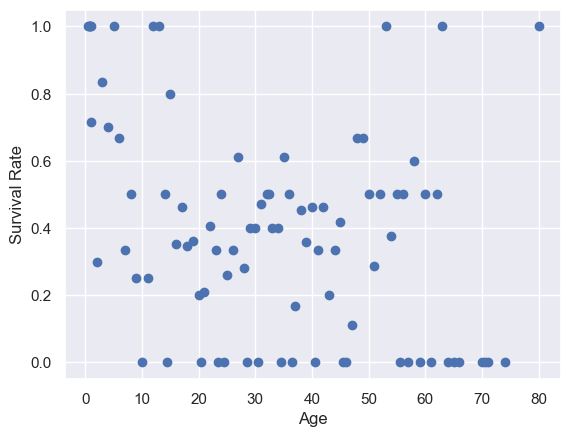

In [251]:
age_rate= calculate_survival_rate_by(df_train, 'Age')
plt.scatter(age_rate.index,age_rate[("Survived",'rate')])
plt.xlabel('Age')
plt.ylabel('Survival Rate')
plt.show()

In [252]:
calculate_survival_rate_by(df_train, 'Parch')

Survived                
           sum count      rate
Parch                         
0          233   678  0.343658
1           65   118  0.550847
2           40    80  0.500000
3            3     5  0.600000
4            0     4  0.000000
5            1     5  0.200000
6            0     1  0.000000

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>,
        <AxesSubplot:title={'center':'isFemale'}>, <AxesSubplot:>]],
      dtype=object)

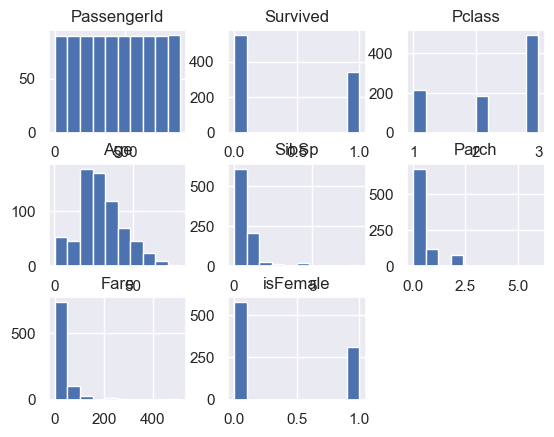

In [253]:
df_train.hist()

## Prepare data for ML

In [292]:
clean_train = df_train[features + [target]].dropna(axis='rows')
clean_test = df_test[features + ['PassengerId']].dropna(axis='rows')


In [293]:
scaler = StandardScaler()
scaler.fit(clean_train[features])
clean_train[features] = scaler.transform(clean_train[features])
clean_test[features] = scaler.transform(clean_test[features])


In [294]:
x = sm.add_constant(clean_train[features])
y = clean_train[target]

## Train a logistic regression model

In [295]:
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.453285
         Iterations 6


In [296]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      710
Method:                           MLE   Df Model:                            3
Date:                Mon, 19 Sep 2022   Pseudo R-squ.:                  0.3289
Time:                        15:03:08   Log-Likelihood:                -323.65
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 1.860e-68
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5230      0.099     -5.261      0.000      -0.718      -0.328
Pclass        -1.0794      0.117     -9.253      0.000      -1.308      -0.851
isFemale       1.2146      0.100     12.168      0.000       1.019       1.410
Age           -0.5361      0.111     -4.841      0.000      -0.753      -0.319
==============================================================================
"""

LL-null (log likelihood-null) - is the log likelyhood of a model which has no independant variables
LLR p-value - Log Likelihood ratio - measures if the model is statistically different from LL-null (meaning if is useless) if is really low, it means that the model is significant.
Pseudo R-squared - McFadden's R-Squared - A good one is between .2 and 0.4 So we are good

## Measure Accuracy

In [297]:
# TODO
y_predicted = results_log.predict()

In [298]:
confusion_matrix = pd.DataFrame(results_log.pred_table())
confusion_matrix.columns = ['Predicted 0', 'Predicted 1']
confusion_matrix = confusion_matrix.rename(index={0:'Actual 0', 1:'Actual 1'})
confusion_matrix

,Predicted 0,Predicted 1
Actual 0,356.0,68.0
Actual 1,83.0,207.0


In [299]:
accuracy = (confusion_matrix['Predicted 0']['Actual 0']+confusion_matrix['Predicted 1']['Actual 1'])/(confusion_matrix.sum().sum())
accuracy

0.788515406162465

## Creating a Submission File

After you build a classificaiton model using `train.csv`, you will need to create a new dataframe that contains the prediction for `test.csv`. The created new dataframe should look like something below:

|PassengerId|Survived|
|-----------|--------|
|892        |0       |
|893        |1       |
|894        |0       |

Finally, you'll use the [```DataFrame.to_csv()``` method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html) to save the dataframe to a CSV file. You need to make sure the index parameter is set to False, otherwise you will add an extra column to our CSV.

* Create a dataframe submission that matches the above specification.
* Use the ```DataFrame.to_csv()``` method to save the ```submission``` dataframe using the filename ```submission_your_name.csv```, using the documentation to look up the correct syntax.

In [266]:
clean_test = df_test[features + ['PassengerId']].dropna(axis='rows')
x_test = sm.add_constant(clean_test[features])
predicted_test = results_log.predict(x_test)
clean_test['Survived'] = [round(p) for p in predicted_test]
clean_test[['PassengerId','Survived']].to_csv('submission_taniahernandezcolon.csv', index=False)

## Open Questions
1. Which feature in your model is most important for predicting `Survived`, why?
2. What is the accuracy of you model? Do you think it is valid, why?
3. Can you think of an application by leveraing the model you've built? 
4. There are many things we can do to improve the accuracy of our model. Please list a few ideas. (Optional)

1. Which feature in your model is most important for predicting `Survived`, why?
- Even though scaling or standarization is not required for this model, we went ahead and standarized to being able to interpret the weight of the coefficents.
- we can see the isFemale weight is the highest once we standarize with a value of 1.2146 making this feature the most important for predicting if the 

2. What is the accuracy of you model? Do you think it is valid, why?
- 78.85%
- Yes, I think is valid in the sense of correctness of fit, since 100% accuracy level would be to overfit the model. 

3. Can you think of an application by leveraing the model you've built? 


4. There are many things we can do to improve the accuracy of our model. Please list a few ideas. (Optional)
- We could consider exploring other classification models such as Support Vector Machines, Decision Trees between others
- If there is more data available we could consider adding another feature that can better explain the target.

## THE END, WELL DONE!

## Submission
Download completed **Week8_LogisticRegression_Homework.ipynb**  and **subission_your_name.csv** from Google Colab and commit to your personal Github repo you shared with the faculty.